# Lecture14 LLM時代のデータサイエンスとは

【2024年度版】

ChatGPTや大規模言語モデル(LLM)の元となったTransformerの概要やHuggingFaceを利用した実行例を試し、最後に、データサイエンスとの関係性についていくつか話題を実例を含めながら紹介する。

- 深層学習から発展し、ChatGPTなどのもとになった、Transformerについて、動かしてみる。（時系列データ予測もやってみる）
- LLMの活用例
 - CSVデータエージェント
 - Q&A with sources

【注意】実行環境は様々なライブラリのバージョンに依存します、将来の動作は全く保証されません。

## Transformer

ここでは「機械学習エンジニアのためのTransfomers」の例を実際に動かしてみます。

ここでは、HuggingFaceというオープンソースのモデルやデータをあつめたハブからpipeline()関数を使ってローカルにtransformerのモデルをダウンロード（実際にはcolabの仮想マシンに）して使っています。


https://github.com/nlp-with-transformers/notebooks/blob/main/01_introduction.ipynb

## Transformerの歴史
Transformerとは、深層学習のアーキテクチャの一つであり、Googleにより発明されました。それ以降、BERTやGPTなどが開発され、現在のGPT3.5やGPT4すなわちChatGPTのもとになるTransformerが開発されてきました。

![Transformerの歴史](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/48e4a5e5c44b86e1593c0945a49af9675cfd7158//images/chapter01_timeline.png)

## 「エンコーダー・デコーダ」アーキテクチャ

深層学習の中で、RNN(再帰型ニューラルネットワーク）を用いて、入力文字の順序を持つ列を、状態にエンコードする、エンコーダーブロックと、状態からこれを、出力文字列に、やはりRNNを用いてでコードするデコードブロックを組み合わせたものが、トランスフォーマの基本となるアーキテクチャです。
![](https://raw.githubusercontent.com/nlp-with-transformers/notebooks/48e4a5e5c44b86e1593c0945a49af9675cfd7158//images/chapter01_enc-dec.png)

In [18]:
#FuguMTの関係でtransformersのバージョンを固定している2024.5
!pip install -U transformers==4.30.2  sentencepiece
!pip install diffusers accelerate scipy safetensors sacremoses

例題とするテキスト（英語）です、~~Amazon~~EC業者への問い合わせのメールのようです。

In [3]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

## テキスト分類の例
pipleline関数に、タスク種別を引数に指定すると、適切なモデルを自動選択して、モデルのインスタンスをcolab仮想マシンに生成します。（具体的なモデルを指定することもできます）。

In [4]:
from transformers import pipeline
#distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


具体的に選択されたモデルを表示します。

In [5]:
classifier.model.name_or_path

'distilbert-base-uncased-finetuned-sst-2-english'

In [6]:
classifier.model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

このようにして、与えた文章に対して感情を分析してくれます。スコア付き。

In [7]:
classifier(text)

[{'label': 'NEGATIVE', 'score': 0.9015445709228516}]

一度、モデルを作れば、あとは何度も別のテキストを試せます。ディープラーニングの父、ヒントン教授のインタビューから

In [8]:
text_hinton="""Geoff Hinton

Yes, I do. I strongly believe that. I strongly believe that when we eventually understand how the brain works,
 that's going to give us lots of psychological insight too. Just as understanding chemistry at the atomic level,
 understanding of how molecules bump into each other and what happens,
 gives us lots of insight into the gas laws.
"""

In [9]:
classifier(text_hinton)

[{'label': 'POSITIVE', 'score': 0.9994831085205078}]

## 固有語の識別

named entity(名前のあるエンティティ)の識別

In [10]:
import pandas as pd
#dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf

ner_tagger = pipeline("ner", aggregation_strategy="simple")

outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556570,Mega,208,212
4,PER,0.590257,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


## 質問に答える

In [11]:

reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

,score,start,end,answer
0,0.631291,335,358,an exchange of Megatron


## 要約をする

In [12]:

summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead. As a lifelong enemy of the Decepticons, I hope you can understand


## 翻訳では、FuguMTを使ってみます。

2024.5 なぜか壊れている。。。

→以下で対応してみた
`pip install -U transformers==4.30.2 `

In [5]:
from transformers import pipeline

fugu_translator = pipeline('translation', model='staka/fugumt-en-ja')

#例(高慢と偏見 Jane Austen)
txt="""It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
 However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well
  fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
"""
fugu_translator(txt)

[{'translation_text': 'それは普遍的に認識されている真実であり、幸運を所有する一人の男は妻を欠いているに違いない。しかし、そのような男の感情や見解が彼の最初の近所に入るかもしれないことはほとんど知られていない、この真実は周囲の家族の心の中でとてもよく固定されているので、彼は誰かまたは彼らの娘の正当な財産と見なされます。'}]

In [6]:
fugu_translator(outputs[0]['summary_text'])

NameError: name 'outputs' is not defined

もう少し本格的な

In [30]:
translator = pipeline("translation", model='Hoax0930/marian-finetuned-kde4-en-to-ja_kftt')
translator(outputs[0]['summary_text'])

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/310M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/808k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/834k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.83M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

[{'translation_text': 'バンブルビーはあなたのドイツのオンラインストアからのプロヴィデンスプライムアクション図をオーダーしました。'}]

In [31]:
translator(txt)

[{'translation_text': '一般に認められていることは、縁起の良い一人の男性は、女性を必要としているに違いありません。そのような男性の感情や考えがあまり知られていないにもかかわらず、この真理は、周囲の家庭の心に深く根付いたものであるため、何人かの娘の正当な所有物と見なされています。'}]

## 画像生成
テキストから画像を生成する有名な、stablefusionも試せます。

In [16]:
!pip install diffusers transformers accelerate scipy safetensors

メモリ利用量が無料版のcolabを超えるかもしれません。その場合は、クラッシュします。がメモリがリセットされるので再実行します。

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

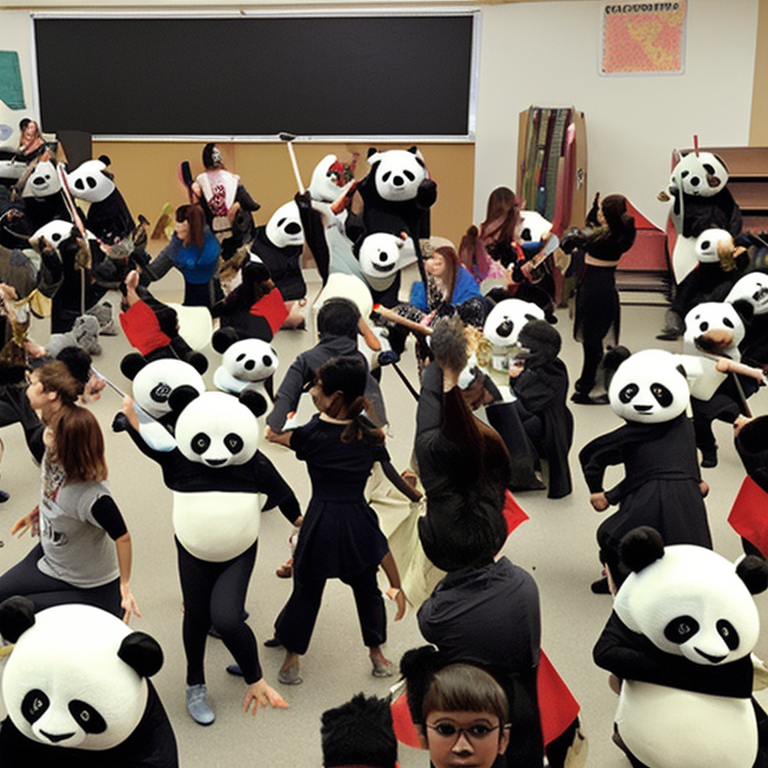

In [17]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "The professor in panda outfits is teaching in a busy and packed class room. Some student is throwing spears to him"
image = pipe(prompt).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

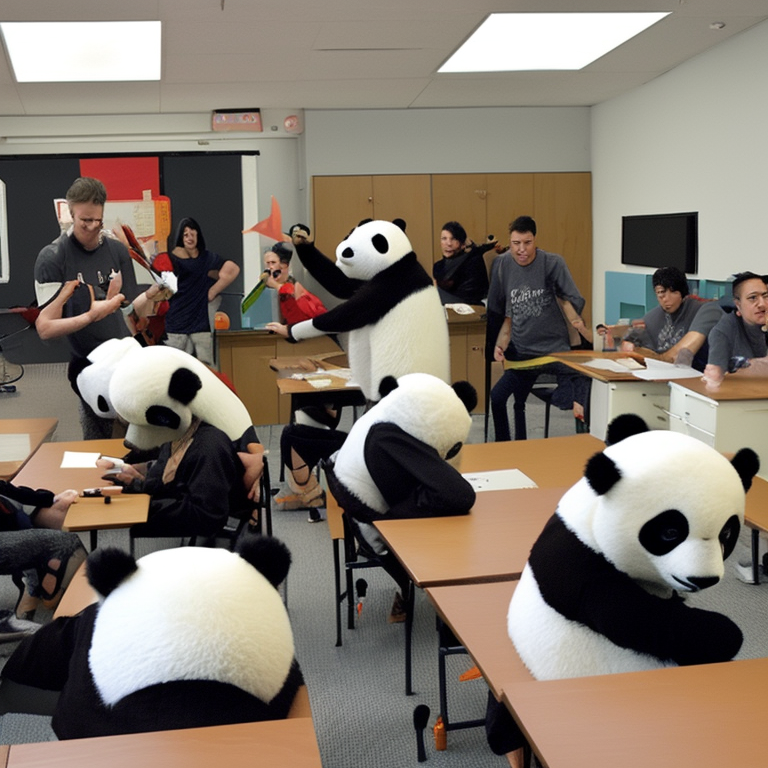

In [18]:
prompt = "The professor in panda outfits is teaching in a busy and packed class room. Some student is throwing spears to him"
image = pipe(prompt).images[0]
image

## langchainで動かしてみます

In [3]:
!pip install langchain langchain_community

まずは、ローカル環境(colab)にモデルをダウンロードしてローカルに使ってみます。

メモリ不足で、セッションがクラッシュする可能性もありますが、実行しなおせば大丈夫です汗

In [1]:
from langchain_community.llms import HuggingFacePipeline
#from langchain import PromptTemplate,  LLMChain
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from IPython.display import display

model_id="bigscience/bloom-1b7"
llm = HuggingFacePipeline.from_model_id(model_id=model_id, task="text-generation", model_kwargs={"temperature":0, "max_length":64})

template = """Question: {question}

Answer: Let's think step by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = "What is electroencephalography?"

answer = llm_chain.run(question)
display(answer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/l

"Question: What is electroencephalography?\n\nAnswer: Let's think step by step. First, we need to understand what is an electroencephalogram. An electroencephalogram is a recording of brain activity. It is a recording of brain activity that is made by placing electrodes on the scalp. The electrodes are placed"

In [7]:
fugu_translator(answer)

[{'translation_text': '質問:脳波とは何か? 答え:一歩一歩考えてみましょう まず 脳波とは何かを理解する必要があります 脳波は脳活動の記録です 頭皮に電極を置いた脳活動の記録です 電極が配置されます'}]

一度でも、ロードが成功すれば、あとは大丈夫。

In [2]:
question = "Why nuclear fusion is so difficult from enginnering perspective?"

display(llm_chain.run(question))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


"Question: Why nuclear fusion is so difficult from enginnering perspective?\n\nAnswer: Let's think step by step. First, we need to understand the basic principles of nuclear fusion. Nuclear fusion is a process in which two nuclei are brought together by the action of a strong electric field. The two nuclei are brought together by the action"

### OpenAIのapiのkeyを持っている場合は。OpenAIの計算リソースが利用できる

OpenAIの（超高速な）サーバーにあるモデルを使うことができます。ローカルメモリを消費しない。

In [2]:
!pip install openai  langchain_openai

In [9]:
# get a token: https://platform.openai.com/account/api-keys

from getpass import getpass

OPENAI_API_KEY = getpass()

··········


In [10]:
import os

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [11]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI

template = """Question: {question}

Answer: Let's think step by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])

llm = OpenAI()

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = "What is electroencephalography?"
answer = llm_chain.run(question)
display(answer)

" Firstly, we need to break down the word 'electroencephalography' into smaller parts. 'Electro' means electricity, 'encephalo' refers to the brain, and 'graphy' is the process of recording something. So, electroencephalography is the process of recording the electrical activity of the brain.\n\nIn simpler terms, electroencephalography (EEG) is a medical procedure that involves placing electrodes on a person's scalp to measure and record the electrical impulses produced by the brain. These electrodes detect and amplify the brain's electrical signals, which are then displayed as a graph or wave pattern on a computer screen. EEG is often used to diagnose and monitor conditions such as epilepsy, sleep disorders, and brain injuries. It can also be used in research to study brain function and activity."

In [12]:
fugu_translator(answer)

[{'translation_text': 'まず「脳波」という言葉を より小さな部分に分解する必要があります 「エレクトロ」は電気 「脳」は脳を指し 「グラフ」は何かを記録するプロセスです エレクトロ脳波は脳の電気的活動を記録するプロセスです 簡単に言うと 脳波(EEG)とは脳が生み出す電気的インパルスを計測し記録する 電極を人の頭皮に貼り付ける医療手法です これらの電極は 脳の電気信号を検知して増幅し コンピュータのコンピュータに表示します 脳波は てんかん、睡眠障害、脳損傷などの状態を診断し監視するのによく使われます 脳機能や活動を研究する研究にも使われます'}]

## 有料のOpenAIのapi_keyを持っていなくても、無料のHugging Faceの計算リソースを使うことができます。

こちらも、HugginfFaceのもつ（たぶん、超高速の）サーバーを利用できます。

In [9]:
!pip install -U from langchain-huggingface

ERROR: Could not find a version that satisfies the requirement from (from versions: none)
ERROR: No matching distribution found for from


In [13]:
# get a token: https://huggingface.co/docs/api-inference/quicktour#get-your-api-token

from getpass import getpass

HUGGINGFACEHUB_API_TOKEN = getpass()

··········


In [14]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN

In [16]:
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import HuggingFaceEndpoint

template = """Question: {question}

Answer: Let's think step by step."""
prompt = PromptTemplate(template=template, input_variables=["question"])

repo_id = "mistralai/Mistral-7B-Instruct-v0.2"
llm = HuggingFaceEndpoint(repo_id=repo_id , temperature=0.5,  max_length=64)

llm_chain = LLMChain(prompt=prompt, llm=llm)

question = "What is electroencephalography?"
answer = llm_chain.run(question)
display(answer)

                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


' Electroencephalography, or EEG, is a medical test that measures the electrical activity of the brain. The word "electroencephalography" comes from three parts:\n\n1. "Electro": This refers to electricity, as the test measures electrical signals.\n2. "Encephalo": This is derived from the Greek word for brain.\n3. "Graphy": This means to write, as the test produces a graph or recording of the brain\'s electrical activity.\n\nSo, EEG is a test that records the electrical activity of the brain using electrodes placed on the scalp. These electrodes detect the tiny electrical impulses produced by neurons in the brain when they communicate with each other. The resulting EEG trace can provide valuable information about the brain\'s electrical activity, which can help diagnose various neurological and psychiatric conditions.'

In [17]:
fugu_translator(answer)

[{'translation_text': '脳波(Electroencephalography、EEG)とは、脳の電気的活動を測定する医学的検査である。「脳波(Electroencephalography)」とは、電気的信号を測定するための電気のことを指す。「脳波(Encephalo)」とは、ギリシャ語で「脳」を意味する。「脳波(Graphy)」とは、脳が電気的活動のグラフや記録を作成するときに、脳が脳に電気的活動を記録することを意味している。つまり、脳波は、頭皮に電極を配置して脳の電気的活動を記録するテストである。これらの電極は、脳内のニューロンが互いに通信する際に生じる小さな電気的インパルスを検出する。結果として生じる脳波の痕跡は、脳の電気的活動に関する貴重な情報を提供し、様々な神経学的および精神医学的状態を診断するのに役立つ。'}]